# Проведение A/B тестирования интернет-магазина <a id='intro'></a>
### Введение
_____
**Описание исследования.**  

В исследовании проводится приоритизация гипотез и анализ по результатам A/B-теста
_____
**Цель исследования.**
    
Принятие решения о судьбе А/B-теста 
    
_____
**Задачи исследования.**

1. [Ознакомление с данными и изучение общей информации](#step0)
2. [Приоритизация гипотез](#step1)
3. [Анализ A/B-теста](#step2)
_____
**Исходные данные.**
    
В рамках исследования предоставлены три таблицы:  

* Файл 'hypothesis.csv' содержит:
    1. Hypothesis — краткое описание гипотезы;
    1. Reach — охват пользователей по 10-балльной шкале;
    1. Impact — влияние на пользователей по 10-балльной шкале;
    1. Confidence — уверенность в гипотезе по 10-балльной шкале;
    1. Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы. 
    
    
+ Файл 'orders.csv' содержит:
    1. transactionId — идентификатор заказа;
    1. visitorId — идентификатор пользователя, совершившего заказ;
    1. date — дата, когда был совершён заказ;
    1. revenue — выручка заказа;
    1. group — группа A/B-теста, в которую попал заказ.


- Файл 'visitors.csv' содержит:
    1. date — дата;
    1. group — группа A/B-теста;
    1. visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Шаг 0: Знакомство с данными, изучение общей информации 
<a id='step0'></a>

In [1]:
#подгрузка необходимых библиотек
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
from matplotlib import pyplot as plt

In [2]:
#загрузка таблицы гипотез, вывод основной информации
try:
    hypothesis = pd.read_csv('hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
pd.set_option('display.max_colwidth', None)
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
#загрузка таблицы заказов, вывод основной информации
try:
    orders = pd.read_csv('orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [4]:
#загрузка таблицы кол-ва посетителей, вывод основной информации
try:
    visitors = pd.read_csv('visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
visitors.info()
visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Пропусков в данных нет, однако даты лучше привести к соответствующему типу:

In [5]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Также, подправим названия столбцов:

In [6]:
hypothesis.columns = hypothesis.columns.str.lower()

Теперь проверим на дубликаты:<a id='duples'></a>


In [7]:
# в таблице гипотез дубликатов нет, это видно непосредственно. посмотрим на таблицу заказов

orders.shape

(1197, 5)

In [8]:
orders = orders.drop_duplicates()
orders.shape

(1197, 5)

In [9]:
#полных дубликатов не было, но заказ определяется по первичному ключу transactionId. 
#посмотрим, нет ли в этом столбце повторений
orders[orders.duplicated(['transactionId'])]

,transactionId,visitorId,date,revenue,group


In [10]:
#у всех заказов разный айди. значит дубликатов нет. посмотрим на посетителей
visitors.shape

(62, 3)

In [11]:
visitors = visitors.drop_duplicates()
visitors.shape

(62, 3)

In [12]:
#полных дубликатов не было. отдельно на всякий случай посмотрим на пары дата-группа
visitors[visitors.duplicated(['date', 'group'])]

,date,group,visitors


Отлично, значит дубликатов нет. Нам дали чистые данные.

#### Вывод:
Данные получены и подготовлены к анализу.

1. Посмотрим сколько групп в АВ-тесте:

In [13]:
[visitors['group'].unique(), orders['group'].unique()]

[array(['A', 'B'], dtype=object), array(['B', 'A'], dtype=object)]

В обоих таблицах всего 2 группы: А и В.

2. Посмотрим временной интервал:

In [14]:
#даты начала:
[orders['date'].min(), visitors['date'].min()]

[Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-01 00:00:00')]

In [15]:
#даты конца:
[orders['date'].max(), visitors['date'].max()]

[Timestamp('2019-08-31 00:00:00'), Timestamp('2019-08-31 00:00:00')]

Тест проходил весь август 2019 года. Датыначала и конца в ордерах и посетителях совпадают.

3. Рассмотреть количество пользователей в каждой группе - по таблице с заказами:

In [16]:
[orders[orders['group']=='A']['visitorId'].nunique(), orders[orders['group']=='B']['visitorId'].nunique()]

[503, 586]

Видно, что в группе В их несколько больше. Насколько это значимо, станет ясно далее.

4. Посмотреть не попадают ли какие-то пользователи в обе группы - по таблице с заказами:

In [17]:
len(orders.groupby('visitorId').agg({'group': 'nunique'}).query('group>1'))

58

58 пользователей попали в обе группы. Это плохо, надо совершенствовать алгоритм распределения.

5. Посмотреть динамику посетителей по дням по группам (visitors).

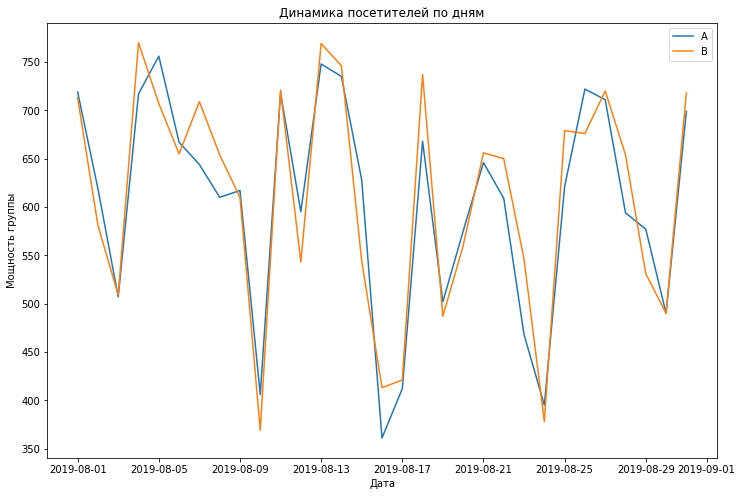

In [18]:
plt.figure(figsize=(12, 8))
plt.plot(visitors[visitors['group']=='A']['date'], visitors[visitors['group']=='A']['visitors'], label='A')
plt.plot(visitors[visitors['group']=='B']['date'], visitors[visitors['group']=='B']['visitors'], label='B')

plt.xlabel('Дата')
plt.ylabel('Мощность группы')
plt.title('Динамика посетителей по дням')
plt.legend() ;

Мощность группы сильно менялась день ото дня, но в обеих группах это происходило синхронно.

### Шаг 1: Приоритизация гипотез <a id='step1'></a>

Задачи этапа - приоритизировать гипотезы. А именно:
+ [Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.](#ICE)
+ [Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.](#RICE)
+ [Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.](#diff)

#### 1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета. <a id='ICE'></a>

In [19]:
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']).round(2)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


#### 2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета. <a id='RICE'></a>

In [20]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


#### 3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло. <a id='diff'></a>

Приоритизация изменилась кардинально.

Гипотезы 7, 2, 3 поднялись в рейтинге.  
Гипотезы 8, 0, 1 понизились.  
Гипотезы 4, 5, 6 остались на месте.  

Ясно, что формулы рассчета отличаются лишь множителем 'reach'.

Взглянем ещё раз на таблицу:

In [21]:
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


Как и ожидалось, у нового лидера, гипотезы 7, максимальный охват. Действительно, ведь в ней идёт речь о всех основных страницах сервиса. В то же время, у бывшего лидера, гипотезы 8, охват минимален - день рождения мало у кого попадет в период акции.

То же можно сказать и об остальных изменениях. Результат ожидаем.

#### Вывод:
Выбор фреймворка кардинально изменил приоритет гипотез. Учёт охвата важен в процессе.  
Итого:
+ ICE:
    1. Запустить акцию, дающую скидку на товар в день рождения
    1. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
    1. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	
    1. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
    1. Запустить собственную службу доставки, что сократит срок доставки заказов
    1. Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
    1. Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар	
    1. Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей	
+ RICE:
    1. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
    1. Запустить собственную службу доставки, что сократит срок доставки заказов	
    1. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
    1. Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар	
    1. Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей	
    1. Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов	
    1. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	
    1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
    1. Запустить акцию, дающую скидку на товар в день рождения	
    

### Шаг 2:  Анализ A/B-теста <a id='step2'></a>


Задача
Проанализировать A/B-тест:
1. [Построить график кумулятивной выручки по группам. Сделать выводы и предположения.](#1)
1. [Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.](#2)
1. [Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.](#3)
1. [Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.](#4)
1. [Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.](#5)
1. [Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.](#6)
1. [Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.](#7)
1. [Построить точечный график стоимостей заказов. Сделать выводы и предположения.](#8)
1. [Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.](#9)
1. [Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.](#10)
1. [Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.](#11)
1. [Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.](#12)
1. [Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.](#13)
1. [Принять решение по результатам теста и объясните его. Варианты решений:](#14)
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

#### 0. Подготовка вспомогательной таблицы. 

Перед тем как начать, создадим таблицу 'cumulativeData' с кумулятивными данными из таблиц 'visitors' и 'orders'

In [22]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [23]:
[cumulativeData['date'].min(), orders['date'].min(), visitors['date'].min()]

[Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-08-01 00:00:00')]

In [24]:
#минимальные даты совпадают, теперь также проверим максимальные
[cumulativeData['date'].max(), orders['date'].max(), visitors['date'].max()]

[Timestamp('2019-08-31 00:00:00'),
 Timestamp('2019-08-31 00:00:00'),
 Timestamp('2019-08-31 00:00:00')]

Отлично, временные границы совпадают, что косвенно свидетельствует о том, что мы всё делаем правильно

#### 1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения. <a id='1'></a>

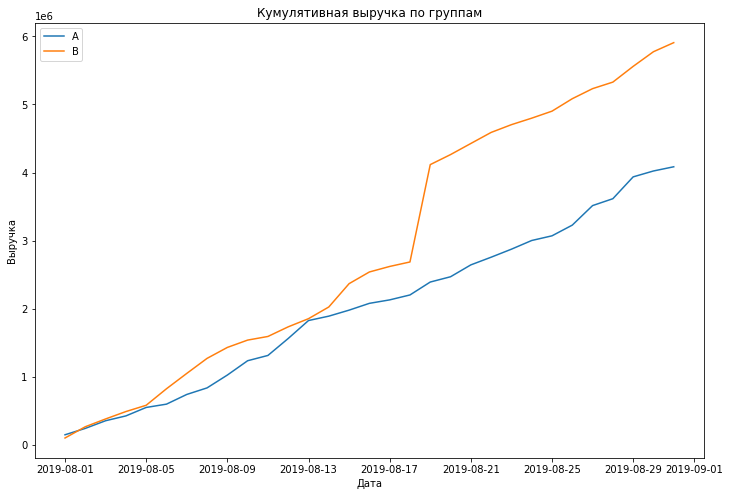

In [25]:

cumulativeDataA = cumulativeData[cumulativeData['group']=='A'].copy()
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'].copy()
plt.figure(figsize=(12, 8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue'], label='B')

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка по группам')
plt.legend() ;

#### Выводы и предположения:
Кумулятивная выручка в обоих группах монотонно растёт, что логично. В группе А рост плавный, можно сказать естественный.  
Кажется, что в группе В кумулятивная выручка больше, однако, 17-21 августа виден резкий скачок. Возможно, это выброс, который случайно попал в группу В. Либо (скорее всего) ошибка в данных, либо невероятно крупный заказ

#### 2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения. <a id='2'></a>

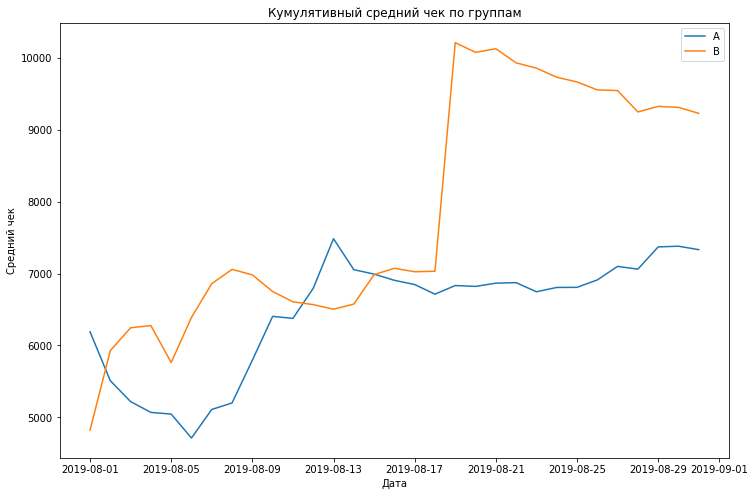

In [26]:
plt.figure(figsize=(12, 8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue']/cumulativeDataA['orders'], label='A')

plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue']/cumulativeDataB['orders'], label='B')

plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Кумулятивный средний чек по группам')
plt.legend() ;

#### Выводы и предположения:
Также как и на первом графике, виден резкий всплеск между 17 и 21 августа в группе В, который скорее всего говорит об аномальном заказе. Более того, далее заметен тренд на снижение среднего чека, что логично: больше аномалий не попадалось, и средний чек постепенно падал до естественных значений

#### 3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения. <a id='3'></a>

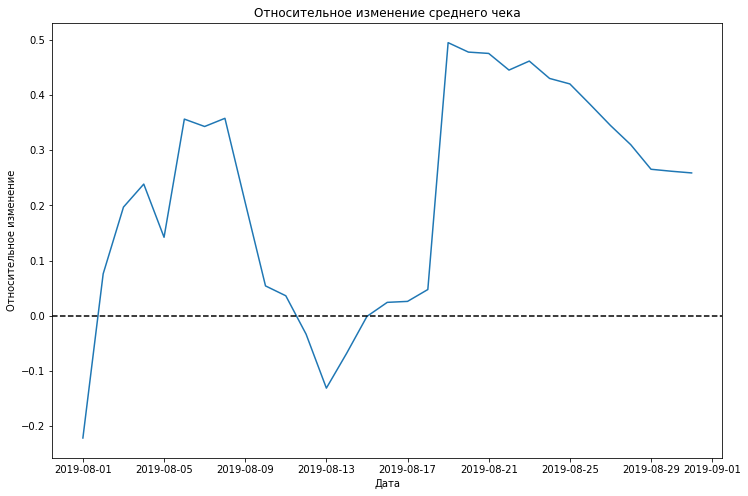

In [27]:
mergedCumulative = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 8))
plt.plot(mergedCumulative['date'], 
         (mergedCumulative['revenueB']/mergedCumulative['ordersB'])
         /(mergedCumulative['revenueA']/mergedCumulative['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.title('Относительное изменение среднего чека') ;

#### Выводы и предположения:
Чтобы что-то понять, надо убрать аномалию. Пока она забивает весь график, сути не видно.

#### 4. Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения. <a id='4'></a>

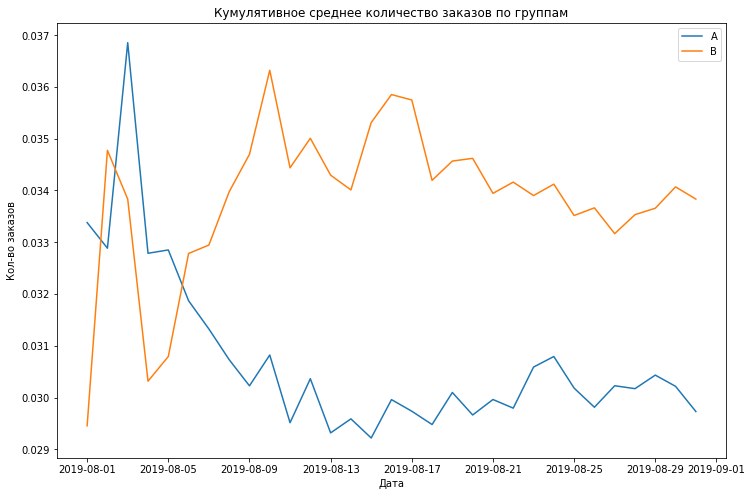

In [28]:
cumulativeDataA['conversion'] = cumulativeDataA['orders']/cumulativeDataA['visitors']
cumulativeDataB['conversion'] = cumulativeDataB['orders']/cumulativeDataB['visitors']

plt.figure(figsize=(12, 8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.xlabel('Дата')
plt.ylabel('Кол-во заказов')
plt.title('Кумулятивное среднее количество заказов по группам')
plt.legend() ;

#### Выводы и предположения:
Заметна устойчиво более высокая конверсия группы В. Здесь никакие выбросы ни при чем.

#### 5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения. <a id='5'></a>

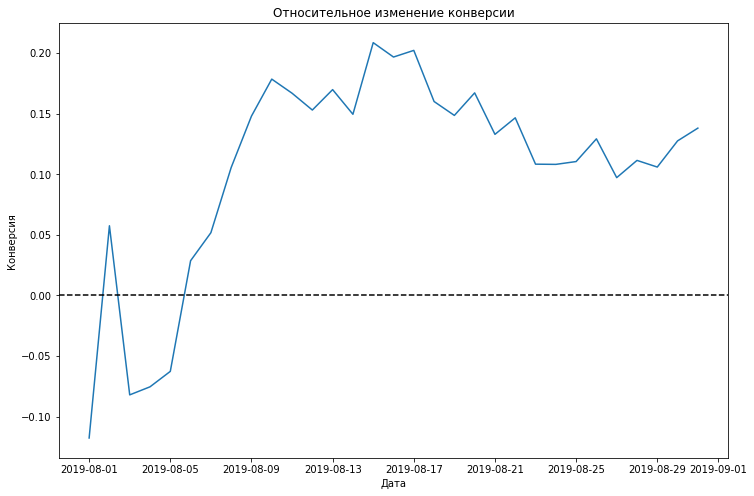

In [29]:
mergedCumulative = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 8))
plt.plot(mergedCumulative['date'], 
         (mergedCumulative['conversionB'])/(mergedCumulative['conversionA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('Относительное изменение конверсии');

#### Выводы и предположения:
Кумулятивная конверсия группы В стабильно выше более чем на 10%

#### 6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения. <a id='6'></a>

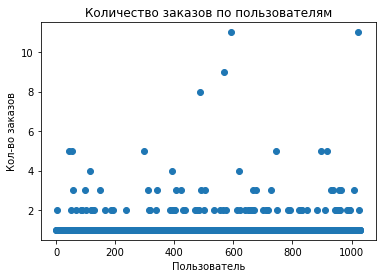

In [30]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

plt.xlabel('Пользователь')
plt.ylabel('Кол-во заказов')
plt.title('Количество заказов по пользователям');

#### Выводы и предположения:
Подавляющее большинство пользователей делали не более двух заказов

#### 7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей. <a id='7'></a>

In [31]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

#### Граница:
Границу стоит установить на уровне четырёх заказов, так как у нас несколько параметров для отсеивания выбросов

#### 8. Построить точечный график стоимостей заказов. Сделать выводы и предположения. <a id='8'></a>

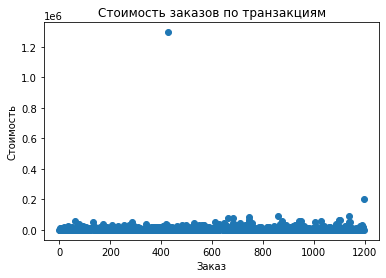

In [32]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])

plt.xlabel('Заказ')
plt.ylabel('Стоимость')
plt.title('Стоимость заказов по транзакциям');

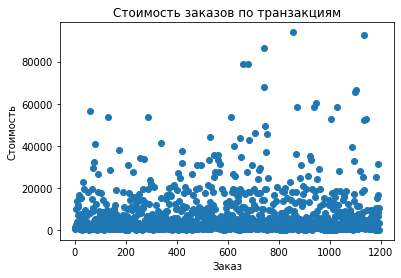

In [33]:
#Выведем дополнительный график без двух явных выбросов
orders_tmp = orders[orders['revenue']<170000]
x_values = pd.Series(range(0, len(orders_tmp['revenue'])))

plt.scatter(x_values, orders_tmp['revenue'])

plt.xlabel('Заказ')
plt.ylabel('Стоимость')
plt.title('Стоимость заказов по транзакциям');

#### Выводы и предположения:
Есть заказ, цена которого кратно больше всех других. Это как раз тот самый выброс, который мы наблюдали ранее. Если убрать два главных выброса, видно, что средний заказ не превышает 20-40 тысяч рублей.

#### 9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов. <a id='9'></a>

In [34]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

#### Граница:
Границу стоит установить на уровне 30000.

#### 10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения. <a id='10'></a>

In [35]:
#Н0: среднее количество заказов в группах А и В одинаково
#H1: среднее количество заказов в группе В и А различно

#таблица что-то заказовавших:
ordersA = orders[orders['group'] == 'A'].groupby('visitorId').agg({'transactionId': 'nunique'})
ordersB = orders[orders['group'] == 'B'].groupby('visitorId').agg({'transactionId': 'nunique'})
ordersA.columns = ['orders']
ordersB.columns = ['orders']

#кол-во не конвертировавшихся посетителей
visitors_with_no_orders_A = visitors[visitors['group']=='A']['visitors'].sum()-len(ordersA)
visitors_with_no_orders_B = visitors[visitors['group']=='B']['visitors'].sum()-len(ordersB)

#перезапишем переменные ordersA и ordersB, добавив соответствующее количество нулей
ordersA = pd.concat(
    [
        ordersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_with_no_orders_A
            ),
            name='orders',
        ),
    ],
    axis=0,
)
ordersB = pd.concat(
    [
        ordersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_with_no_orders_B
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#выведем p-value и относительное различие в средних:
print(f'Относительное различие в средних: {ordersB.mean()/ordersA.mean()-1:.2%}')

results = stats.mannwhitneyu(ordersA, ordersB)
print(f'p-value: {results.pvalue:.2%}')
alpha = .05
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Относительное различие в средних: 13.81%
p-value: 1.68%
Отвергаем нулевую гипотезу


#### Выводы и предположения:
p-значение 1.7%. Нулевую гипотезу получилось отвергнуть в пользу гипотезы H1. Среднее количество заказов в группе В на 14 процентов больше чем в группе А.

#### 11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения. <a id='11'></a>

In [36]:
#Н0: средний чек в группах А и В одинаков
#H1: средний чек в группе В и А различен
 
ordersA = orders[orders['group'] == 'A']
ordersB = orders[orders['group'] == 'B']


#выведем p-value и относительное различие в средних:
print(f'Относительное различие в средних: {ordersB["revenue"].mean()/ordersA["revenue"].mean()-1:.2%}')

results = stats.mannwhitneyu(ordersA['revenue'], ordersB['revenue'])
print(f'p-value: {results.pvalue:.2%}')
alpha = .05
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Относительное различие в средних: 25.87%
p-value: 72.93%
Не получилось отвергнуть нулевую гипотезу


#### Выводы и предположения:
p-значение 73%. Не получилось отвергнуть нулевую гипотезу: между группами нет статистически значимых различий в количестве заказов на посетителя.

#### 12. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения. <a id='12'></a>

Для начала очистим данные:

In [37]:
#очистим данные по сумме заказа:
ordersA = orders[orders['group'] == 'A']
ordersB = orders[orders['group'] == 'B']
ordersA = ordersA[ordersA['revenue']<=30000]
ordersB = ordersB[ordersB['revenue']<=30000]

#сгруппируем и очистим имеющиеся данные:
orders_amount_A = ordersA.groupby('visitorId').agg({'transactionId': 'nunique'})
orders_amount_B = ordersB.groupby('visitorId').agg({'transactionId': 'nunique'})
orders_amount_A.columns = ['orders']
orders_amount_B.columns = ['orders']
orders_amount_A = orders_amount_A[orders_amount_A['orders']<=4]
orders_amount_B = orders_amount_B[orders_amount_B['orders']<=4]

#очистим данные по заказам по количеству покупок на пользователя
ordersA = ordersA[ordersA['visitorId'].isin(orders_amount_A.index)]
ordersB = ordersB[ordersB['visitorId'].isin(orders_amount_B.index)]


Теперь перейдём к проверке гипотезы

In [38]:
#Н0: среднее количество заказов в группах А и В одинаково
#H1: среднее количество заказов в группе В БОЛЬШЕ чем в группе А

#кол-во посетителей без заказов:
visitors_with_no_orders_A = visitors[visitors['group']=='A']['visitors'].sum()-len(ordersA)
visitors_with_no_orders_B = visitors[visitors['group']=='B']['visitors'].sum()-len(ordersB)

#перезапишем переменные orders_amount_A и orders_amount_B, добавив соответствующее количество нулей
orders_amount_A = pd.concat(
    [
        orders_amount_A['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_with_no_orders_A
            ),
            name='orders',
        ),
    ],
    axis=0,
)
orders_amount_B = pd.concat(
    [
        orders_amount_B['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_with_no_orders_B
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#выведем p-value и относительное различие в средних:
print(f'Относительное различие в средних: {orders_amount_B.mean()/orders_amount_A.mean()-1:.2%}')

results = stats.mannwhitneyu(orders_amount_A, orders_amount_B)
print(f'p-value: {results.pvalue:.2%}')
alpha = .05
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Относительное различие в средних: 15.56%
p-value: 1.79%
Отвергаем нулевую гипотезу


#### Выводы и предположения:
p-значение 1.79%. Нулевую гипотезу получилось отвергнуть в пользу гипотезы H1. Среднее количество заказов в группе В на 15.5 процентов больше чем в группе А.

#### 13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения. <a id='13'></a>

In [39]:
#Н0: средний чек в группах А и В одинаков
#H1: средний чек в группе В БОЛЬШЕ чем в группе А

#данные уже подготовлены в предыдущем блоке. осталось их проанализировать

#выведем p-value и относительное различие в средних:
print(f'Относительное различие в средних: {ordersB["revenue"].mean()/ordersA["revenue"].mean()-1:.2%}')

results = stats.mannwhitneyu(ordersA['revenue'], ordersB['revenue'])
print(f'p-value: {results.pvalue:.2%}')
alpha = .05
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


Относительное различие в средних: -1.82%
p-value: 94.54%
Не получилось отвергнуть нулевую гипотезу


#### Выводы и предположения:
p-значение 95%. Не получилось отвергнуть нулевую гипотезу: между группами нет статистически значимых различий в среднем чеке.

#### 14. Принять решение по результатам теста и объясните его. <a id='14'></a>

Остановить тест, зафиксировать победу группы В.

При отсутствии статистически значимой разницы в среднем чеке, конверсия в группе В существенно лучше. Этого достаточно для объявления её победы.